In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

In [98]:
T = np.linspace(0, 1, 10000)
F_MAX = 100

def funcion_variable(f_inicial: float = 0, f_final: float= 10, A: float=1.0, t=T):
  f = np.linspace(f_inicial, f_final, t.size)
  return A*np.sin(np.pi*t*f)

def tomar_ventana_fft(f: np.ndarray, start: int= 0, end: int = 100, t=T, f_max=F_MAX):
  assert end > start, "end must be greater than start"
  T = (t[-1] - t[0])/t.size
  N = end-start
  frqStep = 1/(T*N)
  max_index = int(1.5*f_max//frqStep) + 1
  if f_max > N*frqStep/2 or max_index > N//2:
    max_index = N//2
  return fft.fft(f[start: end])[:max_index], fft.fftfreq(N, T)[:max_index]

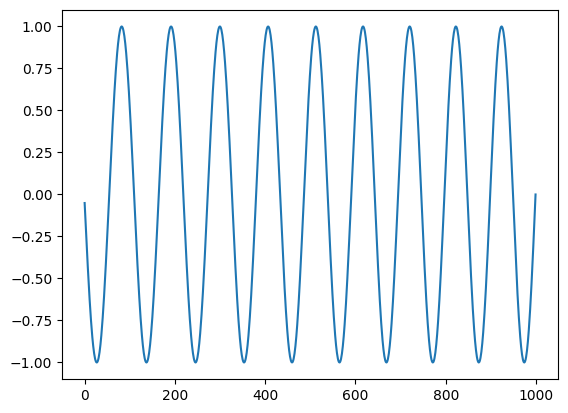

<StemContainer object of 3 artists>

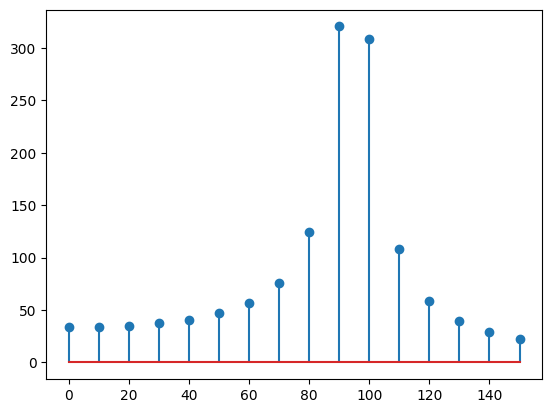

In [101]:
start, end = 9000, 10000
F = funcion_variable(f_final=F_MAX)
plt.plot(F[start:end])
plt.show()
w, freq  = tomar_ventana_fft(F, start=start, end=end)
plt.stem(freq, np.abs(w))